In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [2]:
data = pd.read_csv('data/AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [3]:
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]

In [4]:
def plot_trend(forecast1, forecast2, forecast3, title):
    plt.figure(figsize=(10, 10))
    plt.plot(train.index, train['#Passengers'], label='Train', color='blue', linestyle='-')
    plt.plot(test.index, test['#Passengers'], label='Test', color='orange', linestyle='-')
    plt.plot(test.index, forecast1, label='SimpleExpSmoothing', color='green', linestyle='-')
    plt.plot(test.index, forecast2, label='Holt-Trend', color='red', linestyle='-')
    plt.plot(test.index, forecast3, label='Holt-Seasonality', color='purple', linestyle='-')
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('#Passengers')
    plt.legend()
    plt.show()


In [5]:
# Fit simple model and get forecasts
model_simple = SimpleExpSmoothing(train['#Passengers']).fit()
forecasts_simple = model_simple.forecast(len(test))

c:\Users\shory\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [6]:
import numpy as np

# Grid Search for Holt's Linear Trend Model
best_alpha, best_beta = 0, 0
best_sse = float('inf')

for alpha in np.arange(0.1, 1.0, 0.1):
    for beta in np.arange(0.1, 1.0, 0.1):
        model_holt = Holt(train['#Passengers'], damped_trend=True).fit(smoothing_level=alpha, smoothing_slope=beta)
        forecasts_holt = model_holt.forecast(len(test))
        sse = np.sum((forecasts_holt - test['#Passengers']) ** 2)
        if sse < best_sse:
            best_sse = sse
            best_alpha, best_beta = alpha, beta

# Fit the best Holt's model
model_holt = Holt(train['#Passengers'], damped_trend=True).fit(smoothing_level=best_alpha, smoothing_slope=best_beta)
forecasts_holt = model_holt.forecast(len(test))

c:\Users\shory\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shory\AppData\Local\Temp\ipykernel_4708\527635913.py:9: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_holt = Holt(train['#Passengers'], damped_trend=True).fit(smoothing_level=alpha, smoothing_slope=beta)
c:\Users\shory\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shory\AppData\Local\Temp\ipykernel_4708\527635913.py:9: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_holt = Holt(train['#Passengers'], damped_trend=True).fit(smoothing_level=alpha, smoothing_slope=beta)
c:\Users\shory\anaconda3\envs\myen

In [7]:
# Fit Holt seasonality model and get forecasts
model_holt_season = ExponentialSmoothing(train['#Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit(optimized=True)
forecasts_holt_season = model_holt_season.forecast(len(test))

c:\Users\shory\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\shory\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


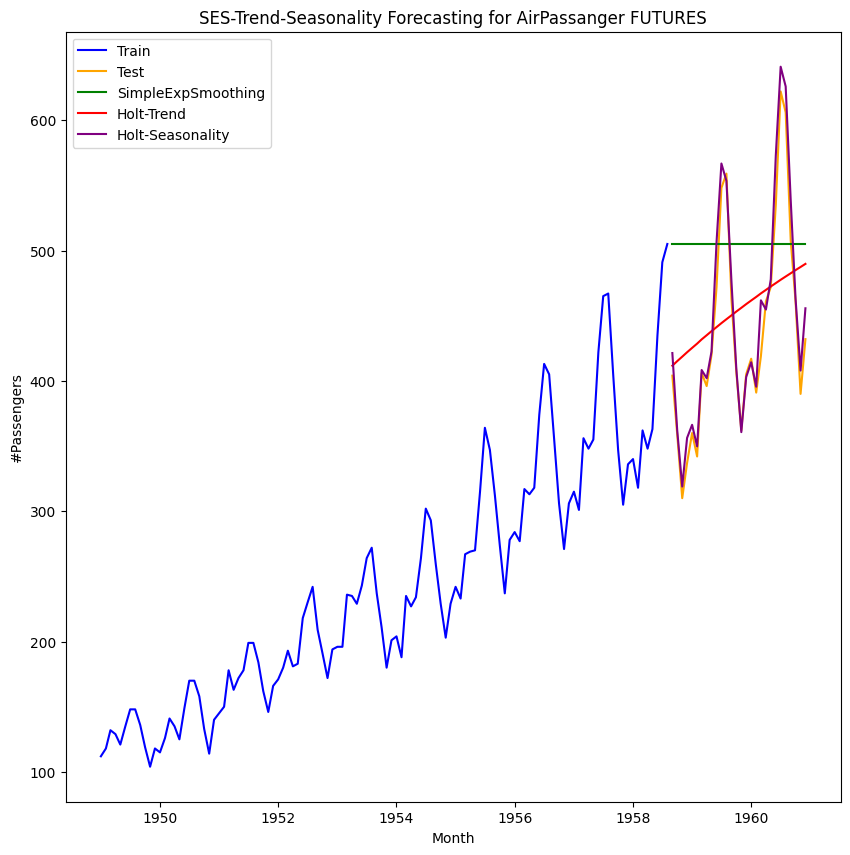

In [8]:
plot_trend(forecasts_simple,forecasts_holt,forecasts_holt_season,f"SES-Trend-Seasonality Forecasting for AirPassanger FUTURES")

In [9]:
model_simple.summary()

Dep. Variable:,#Passengers,No. Observations:,116
Model:,SimpleExpSmoothing,SSE,83037.230
Optimized:,True,AIC,766.521
Trend:,None,BIC,772.028
Seasonal:,None,AICC,766.881
Seasonal Periods:,None,Date:,"Thu, 04 Jul 2024"
Box-Cox:,False,Time:,15:02:55
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,112.00000,l.0,False


In [10]:
model_holt.summary()

Dep. Variable:,#Passengers,No. Observations:,116
Model:,Holt,SSE,180790.953
Optimized:,True,AIC,862.775
Trend:,Additive,BIC,876.543
Seasonal:,None,AICC,863.812
Seasonal Periods:,None,Date:,"Thu, 04 Jul 2024"
Box-Cox:,False,Time:,15:02:55
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1000000,alpha,False
smoothing_trend,0.1000000,beta,False


In [11]:
model_holt_season.summary()

Dep. Variable:,#Passengers,No. Observations:,116
Model:,ExponentialSmoothing,SSE,10336.958
Optimized:,True,AIC,552.827
Trend:,Multiplicative,BIC,596.885
Seasonal:,Multiplicative,AICC,559.879
Seasonal Periods:,12,Date:,"Thu, 04 Jul 2024"
Box-Cox:,False,Time:,15:02:55
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3853483,alpha,True
smoothing_trend,4.3552e-06,beta,True
